**<font color='blue'>F21DL Data Mining and Machine Learning: Your DM&ML Portfolio</font>**

In [ ]:
from google.colab import drive
drive.mount('/conten

In [3]:
!pip install opencv-python

In [5]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, auc

import cv2  # OpenCV Python library for computer vision

# Sampling Libraries
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import VarianceThreshold

In [8]:
# Load the dataset
xtrain = pd.read_csv('/content/drive/MyDrive/ML Coursework datasets/CompleteDataSet/x_train_all.csv')
ytrain = pd.read_csv('/content/drive/MyDrive/ML Coursework datasets/CompleteDataSet/y_train_all.csv')



## Data Exploration

In [9]:
# Display the first few rows of the dataset
print(xtrain.head(5))

      0     1     2     3     4      5      6      7      8      9  ...  \
0  78.0  77.0  76.0  82.0  87.0   92.0  104.0  119.0  117.0  120.0  ...   
1  73.0  75.0  79.0  78.0  76.0   75.0   89.0  107.0  133.0  125.0  ...   
2  72.0  75.0  79.0  77.0  81.0   89.0  105.0  109.0   86.0   90.0  ...   
3  67.0  70.0  74.0  80.0  93.0  107.0  110.0   96.0   69.0  100.0  ...   
4  74.0  74.0  73.0  72.0  77.0   87.0  104.0  109.0   84.0   83.0  ...   

    2294  2295  2296   2297  2298  2299  2300   2301   2302   2303  
0   87.0  79.0  72.0   76.0  83.0  95.0  99.0   98.0   95.0   94.0  
1   96.0  93.0  85.0   77.0  69.0  73.0  83.0  100.0  101.0  101.0  
2   98.0  95.0  88.0   80.0  73.0  71.0  74.0   80.0   89.0   95.0  
3  112.0  92.0  87.0   82.0  77.0  72.0  70.0   72.0   81.0   88.0  
4  100.0  98.0  99.0  100.0  99.0  89.0  78.0   66.0   68.0   72.0  

[5 rows x 2304 columns]


In [10]:
ytrain.head(5)

,0
0,0
1,0
2,0
3,0
4,0


In [11]:
xtrain.shape

(9690, 2304)

In [12]:
ytrain.shape

(9690, 1)

In [13]:
# Summary statistics
xtrain.describe()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
count,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,...,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.00000,9690.000000,9690.000000,9690.000000
mean,89.658514,89.545201,89.343756,89.566770,89.812590,89.853251,89.883282,89.978431,90.170175,90.519092,...,72.234881,71.833437,71.394118,70.572136,69.660165,68.878638,68.29453,67.831889,67.548297,67.393189
std,77.521341,77.430539,77.350452,77.498754,77.437292,77.279125,77.085714,77.081732,77.062371,77.155644,...,65.369022,65.439225,65.402298,65.144238,64.885963,64.530366,64.27455,63.799350,63.437102,63.506304
min,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.00000,5.000000,4.000000,4.000000
25%,32.000000,32.000000,32.000000,31.000000,32.000000,32.000000,32.000000,33.000000,33.000000,33.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,25.000000,25.00000,25.000000,25.000000,25.000000
50%,57.000000,58.000000,57.000000,58.000000,58.000000,58.000000,58.000000,58.000000,59.000000,59.000000,...,46.000000,46.000000,46.000000,45.000000,45.000000,44.000000,44.00000,43.000000,43.000000,43.000000
75%,126.000000,124.000000,122.750000,123.000000,125.000000,123.750000,124.000000,124.000000,124.000000,126.000000,...,95.000000,93.000000,91.000000,88.000000,86.000000,84.000000,82.00000,82.000000,81.000000,81.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000


In [14]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9690 entries, 0 to 9689
Columns: 2304 entries, 0 to 2303
dtypes: float64(2304)
memory usage: 170.3 MB


## Missing values analysis

In [15]:
# Check for missing values
missing_values = xtrain.isnull().sum()
print("Missing Values:")
print("----------------")
print(missing_values)
## There is no missing values...

Missing Values:
----------------
0       0
1       0
2       0
3       0
4       0
       ..
2299    0
2300    0
2301    0
2302    0
2303    0
Length: 2304, dtype: int64


## Findings

There is no missing values in the dataset and so we are good here..

## Exploratory Data Analysis

In [16]:
X = xtrain.values
Y = ytrain.values

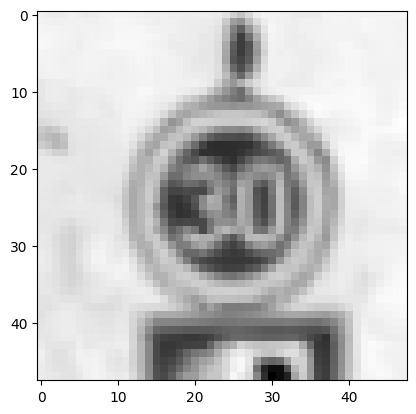

In [17]:
some_digit = X[1500]
some_digit_image = some_digit.reshape(48, 48)
plt.imshow(some_digit_image, cmap=plt.cm.binary)
plt.show()

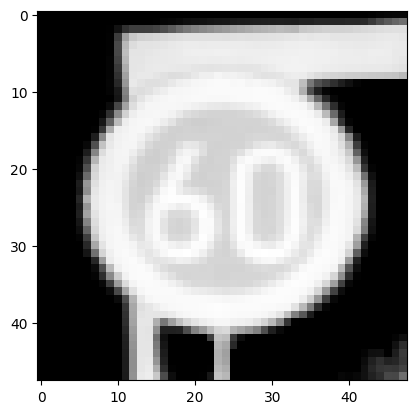

In [18]:
some_digit = X[5000]
some_digit_image = some_digit.reshape(48, 48)
plt.imshow(some_digit_image, cmap=plt.cm.binary)
plt.show()

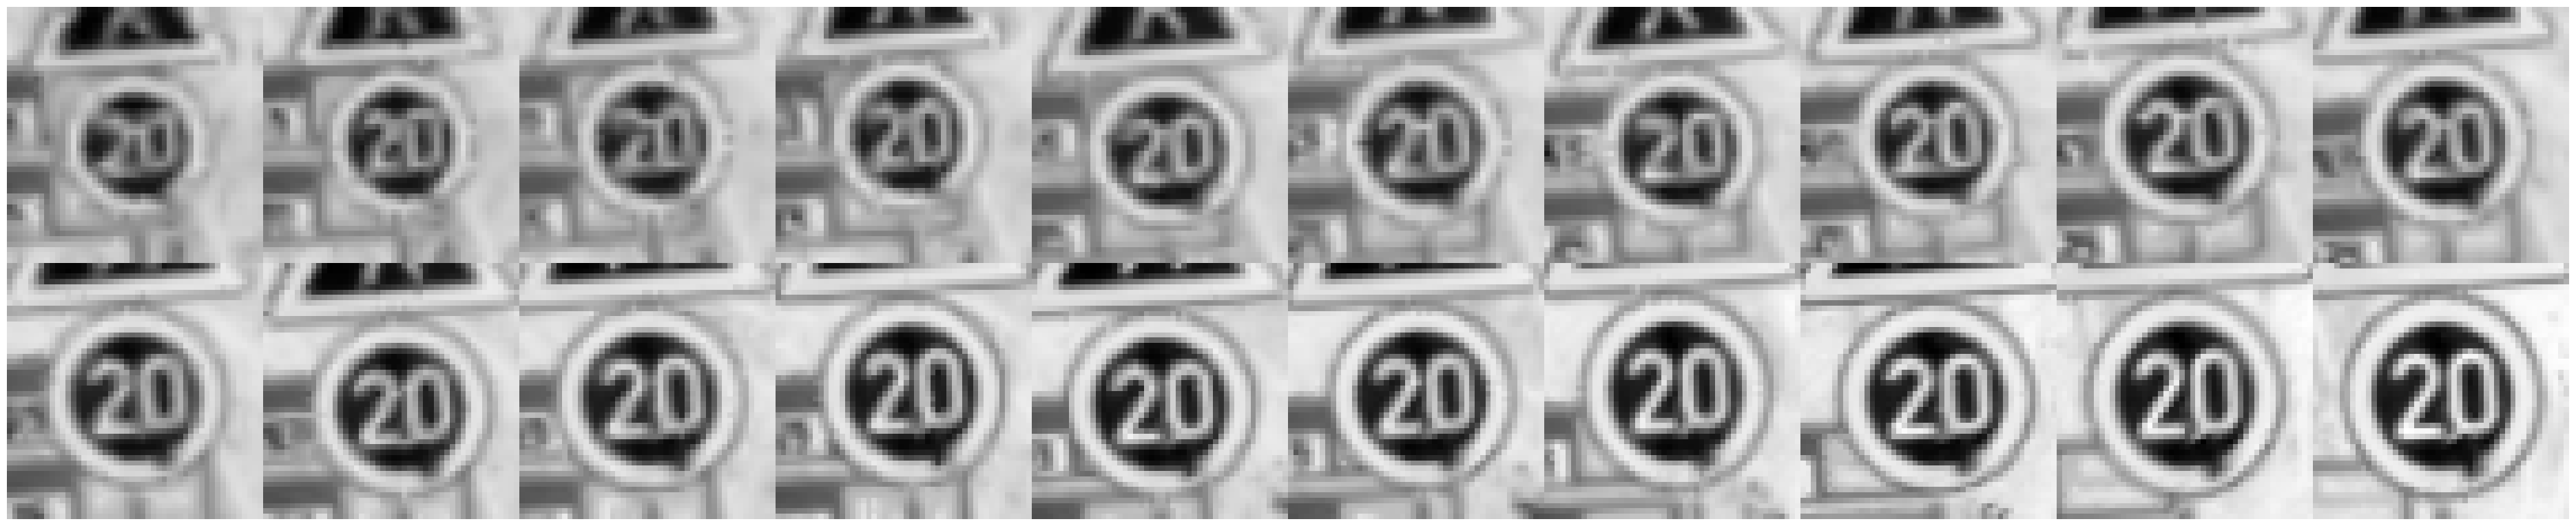

In [19]:
def plot_digits(instances, images_per_row=10, **options):
    size = 48  # Change the size to match your image size (48x48)
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size, size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row: (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap=plt.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(48, 48))
example_images = X[:20]
plot_digits(example_images, images_per_row=10)
plt.show()


### <span style="color:blue">Findings</span>

Looking at above sample traffic signal images, they are speed limit signals like 30km/hour, 60km/hour, etc..

## Outlier analysis

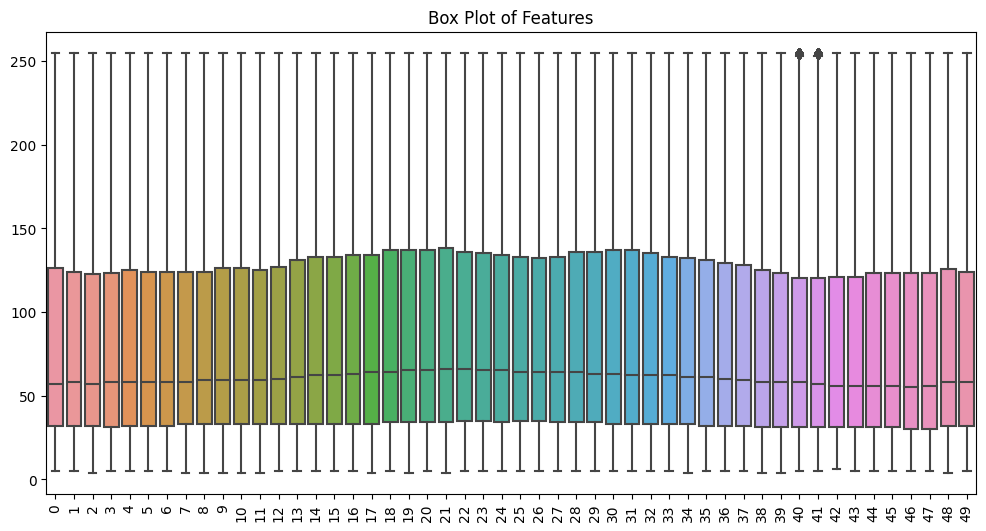

In [20]:
#Randomly checking if the feature has any outliers
subset_of_features = xtrain.iloc[:, :50]  # Example: Checking outliers for the first 50 features
plt.figure(figsize=(12, 6))
sns.boxplot(data=subset_of_features)
plt.title('Box Plot of Features')
plt.xticks(rotation=90)
plt.show()

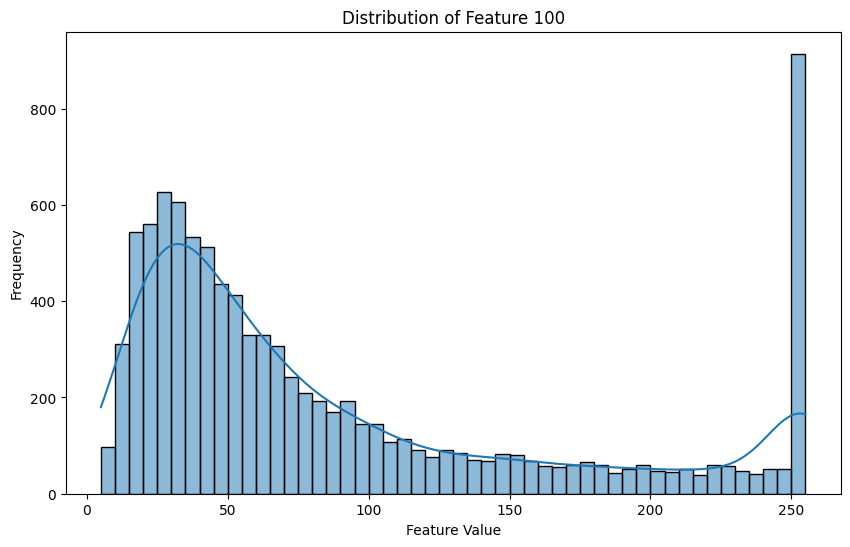

Number of outliers: 0
Minimum value: 5.0
Maximum value: 255.0
Mean value: 88.88844169246646
Standard deviation: 76.52516290632772
Lower threshold for outliers: -293.73737283917217
Upper threshold for outliers: 471.5142562241051


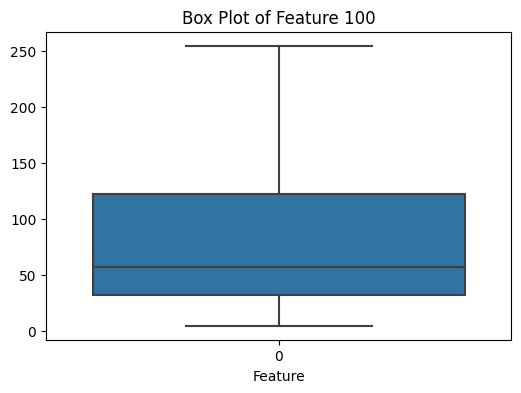

In [21]:

# Need to visualize sample single image feature to understand the pattern, for example am taking
# index 0, 100, 1000 for my analysis
feature_index = 100
selected_feature = xtrain.iloc[:, feature_index]

# Visualize the distribution of the selected feature
plt.figure(figsize=(10, 6))
sns.histplot(selected_feature, bins=50, kde=True)
plt.title(f'Distribution of Feature {feature_index}')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.show()

# Define a threshold for outliers (e.g., values outside of 3 standard deviations from the mean)
threshold = 5  # You can adjust this threshold based on your data and problem

# Identify outliers
mean_value = np.mean(selected_feature)
std_deviation = np.std(selected_feature)
lower_threshold = mean_value - threshold * std_deviation
upper_threshold = mean_value + threshold * std_deviation

outliers = selected_feature[(selected_feature < lower_threshold) | (selected_feature > upper_threshold)]

# Print information about outliers
print(f'Number of outliers: {len(outliers)}')
print(f'Minimum value: {selected_feature.min()}')
print(f'Maximum value: {selected_feature.max()}')
print(f'Mean value: {mean_value}')
print(f'Standard deviation: {std_deviation}')
print(f'Lower threshold for outliers: {lower_threshold}')
print(f'Upper threshold for outliers: {upper_threshold}')

# Optionally, you can visualize the outliers using a box plot
plt.figure(figsize=(6, 4))
sns.boxplot(data=selected_feature)
plt.title(f'Box Plot of Feature {feature_index}')
plt.xlabel('Feature')
plt.show()


### <span style="color:blue">Findings</span>

There are no outliers detected for this specific feature. All data points fall within the defined outlier threshold limits.

The absence of outliers for the set of sample feature suggests that it may not require us performing any outlier-specific treatment.

## Analyzing number of classes or labels

In [22]:
# Check how many classes are available in ytrain
num_classes = ytrain['0'].nunique()
print(f"Number of unique classes: {num_classes}")

Number of unique classes: 10


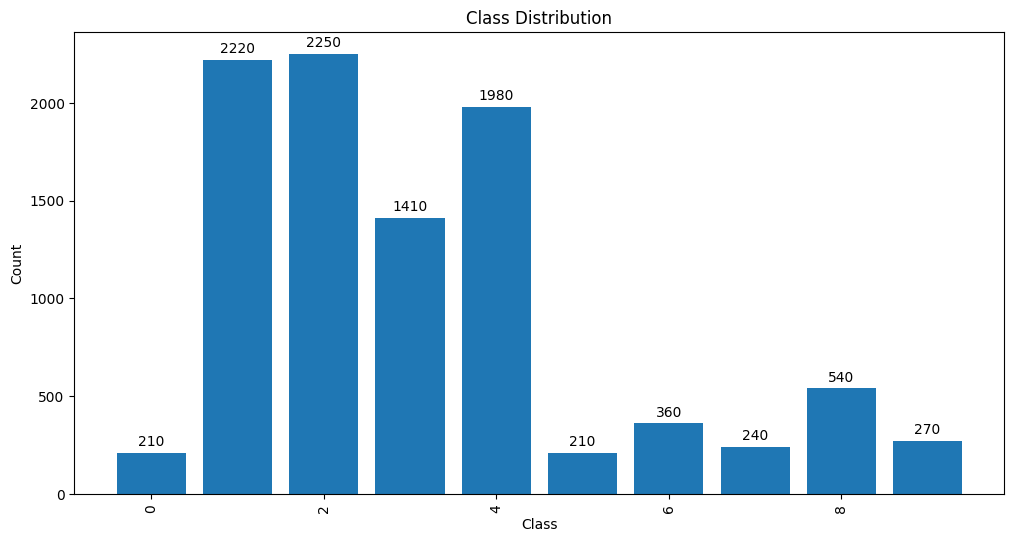

In [23]:
class_counts = ytrain['0'].value_counts().reset_index()
class_counts.columns = ['Class', 'Count']

# Sort the classes by count (optional)
class_counts = class_counts.sort_values(by='Count', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(class_counts['Class'], class_counts['Count'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=90)  # Rotate class labels for better readability

# Add data labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset for the label
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()


### <span style="color:blue">Findings</span>

There is a significant class imbalance in the dataset. Class 2 and Class 1 have the highest counts (2250 and 2220, respectively), while other classes have considerably lower counts. This imbalance may pose challenges when training a machine learning model, as the model might be biased towards the majority classes.

To address this issue and improve model performance while avoiding overfitting problems, we can consider the following techniques:

**<span style="color:green">1. Class Balancing:</span>**  We might consider techniques to address class imbalance, such as oversampling the minority classes (creating more samples for the underrepresented classes) or undersampling the majority classes (reducing the number of samples for the overrepresented classes). Another approach is using synthetic data generation techniques like SMOTE (Synthetic Minority Over-sampling Technique).

**<span style="color:green">2. Data Augmentation:</span>** Since this is image data, data augmentation can be beneficial as well. Generate augmented images by applying random transformations like rotation, scaling, and flipping to increase the diversity of your dataset. This can help the model perform better on all classes.

Let's experiment with the above two techniques and validate their performances.

### <span style="color:blue"> Do we need to apply any preprocessing or normalization procedures? If so, why ?

Whether we need to perform feature scaling on our dataset depends on the machine learning algorithms
we plan to use and the nature of the features.

Here are some considerations to help you decide if feature scaling is necessary for our dataset:

1. Many machine learning algorithms are sensitive to the scale of features. Examples include gradient-based optimization algorithms (e.g., gradient descent), k-nearest neighbors, and support vector machines. Rescaling features can help these algorithms converge faster and produce better results.

2. Algorithms that rely on distance metrics, such as k-means clustering, hierarchical clustering, and some variants of principal component analysis (PCA), can be influenced by the scale of features.

***Tree-based algorithms are fairly insensitive to the scale of the features***

Related Articles:
    https://www.analyticsvidhya.com/blog/2022/10/frequently-asked-interview-questions-on-naive-bayes-classifier/#:~:text=A%20sure%20short%20answer%20should,will%20not%20require%20feature%20scaling.
    https://towardsdatascience.com/what-is-feature-scaling-why-is-it-important-in-machine-learning-2854ae877048#:~:text=Feature%20scaling%20is%20the%20process,need%20to%20perform%20feature%20scaling.
    https://atoti.io/articles/when-to-perform-a-feature-scaling/

Bayes Algorithm
Do we need feature scaling for Bayes Net?

Naïve Bayes is generally not sensitive to feature scaling because it's based on probability and conditional independence assumptions rather than the absolute values of features. This property makes Naïve Bayes one of the few machine learning algorithms that often work well without the need for feature scaling.

## Multinomial NB

## Preprocessing - Experiment1: Class Balancing (Over Sampling)

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize SMOTE to oversample the minority classes
smote = SMOTE(random_state=42)

# Fit and apply SMOTE to the training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Now, X_train_resampled and y_train_resampled contain the balanced training data
# We can proceed to train the machine learning model on this balanced dataset


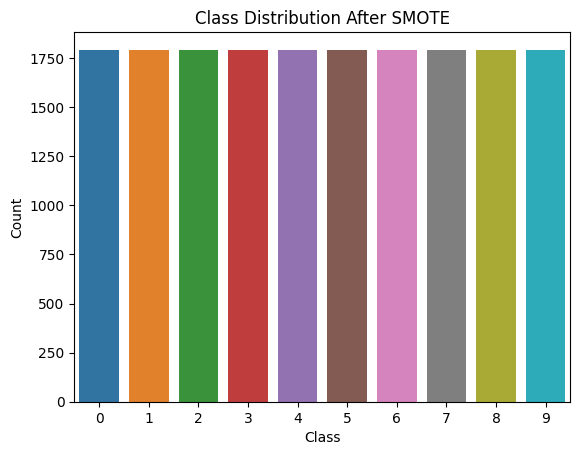

In [25]:
# Visualize oversampled data
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Perfect to go!

### Model training, prediction and validation on original data (Multiclass classification)

In [26]:
# Create a Multinomial Naïve Bayes classifier
nb_classifier = MultinomialNB()

# Perform cross-validation and get predictions
y_pred = cross_val_predict(nb_classifier, X_train, y_train, cv=5)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred)

# Generate a classification report
report = classification_report(y_train, y_pred)

# Create a confusion matrix
confusion = confusion_matrix(y_train, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(report)
print("Confusion Matrix:\n", confusion)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Accuracy: 0.35036119711042313
              precision    recall  f1-score   support

           0       0.10      0.41      0.16       164
           1       0.43      0.18      0.25      1769
           2       0.43      0.29      0.34      1793
           3       0.34      0.39      0.36      1122
           4       0.40      0.63      0.49      1588
           5       0.19      0.66      0.30       166
           6       0.22      0.15      0.18       291
           7       0.30      0.32      0.31       193
           8       0.54      0.26      0.35       449
           9       0.23      0.27      0.25       217

    accuracy                           0.35      7752
   macro avg       0.32      0.35      0.30      7752
weighted avg       0.39      0.35      0.34      7752

Confusion Matrix:
 [[ 67  25  31  23  14   0   2   0   1   1]
 [355 311 326 230 423   9  44   4  14  53]
 [119 150 518 237 682  29  10   6   8  34]
 [ 59 100 165 435 327   8  12   0   2  14]
 [ 52 118 122 244 99

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment2: Class Balancing (Under Sampling)

In [27]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize the RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Fit and apply the RandomUnderSampler to the training data only
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

# Now, X_train_resampled and y_train_resampled contain the balanced training data with undersampling
# we can proceed to train your machine learning model on this balanced dataset


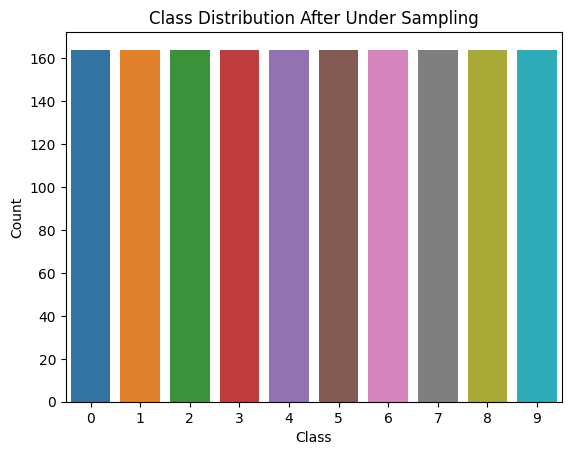

In [28]:
# Visualize oversampled data
sns.countplot(x=y_train_under)
plt.title('Class Distribution After Under Sampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Perfect to go!

In [29]:
# Create a Multinomial Naïve Bayes classifier
nb = MultinomialNB()

# Perform cross-validation and get predictions
y_pred_under = cross_val_predict(nb, X_train_under, y_train_under, cv=5)

# Calculate accuracy
accuracy = accuracy_score(y_train_under, y_pred_under)

# Generate a classification report
report = classification_report(y_train_under, y_pred_under)

# Create a confusion matrix
confusion = confusion_matrix(y_train_under, y_pred_under)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(report)
print("Confusion Matrix:\n", confusion)


Accuracy: 0.3567073170731707
              precision    recall  f1-score   support

           0       0.55      0.40      0.46       164
           1       0.27      0.16      0.21       164
           2       0.32      0.35      0.33       164
           3       0.30      0.45      0.36       164
           4       0.38      0.63      0.47       164
           5       0.32      0.65      0.43       164
           6       0.31      0.15      0.20       164
           7       0.45      0.29      0.36       164
           8       0.34      0.25      0.29       164
           9       0.42      0.23      0.29       164

    accuracy                           0.36      1640
   macro avg       0.37      0.36      0.34      1640
weighted avg       0.37      0.36      0.34      1640

Confusion Matrix:
 [[ 66  26  27  22  17   0   2   0   1   3]
 [ 28  27  34  22  37   0   6   0   4   6]
 [ 10  13  58  18  61   1   1   0   0   2]
 [  9   8  24  73  44   0   4   0   0   2]
 [  3  10  16  27 104

## Lets try the same experiment on binary dataset

### 1) Multinormial NB

In [30]:
# Load the dataset
xtrain_bin = pd.read_csv('/content/drive/MyDrive/ML Coursework datasets/Binary_Classification/x_train_bin.csv')
ytrain_bin = pd.read_csv('/content/drive/MyDrive/ML Coursework datasets/Binary_Classification/y_train_bin.csv')

In [31]:
xtrain_bin.info

<bound method DataFrame.info of          0     1     2     3     4      5      6      7      8      9  ...  \
0     78.0  77.0  76.0  82.0  87.0   92.0  104.0  119.0  117.0  120.0  ...   
1     73.0  75.0  79.0  78.0  76.0   75.0   89.0  107.0  133.0  125.0  ...   
2     72.0  75.0  79.0  77.0  81.0   89.0  105.0  109.0   86.0   90.0  ...   
3     67.0  70.0  74.0  80.0  93.0  107.0  110.0   96.0   69.0  100.0  ...   
4     74.0  74.0  73.0  72.0  77.0   87.0  104.0  109.0   84.0   83.0  ...   
...    ...   ...   ...   ...   ...    ...    ...    ...    ...    ...  ...   
2425  95.0  97.0  95.0  82.0  70.0   92.0  102.0  104.0  107.0  108.0  ...   
2426  55.0  55.0  58.0  64.0  57.0   51.0   57.0   64.0   64.0   67.0  ...   
2427  97.0  94.0  74.0  67.0  97.0  103.0  105.0  105.0  102.0  101.0  ...   
2428  74.0  77.0  74.0  65.0  64.0   79.0   85.0   88.0   92.0   92.0  ...   
2429  83.0  81.0  67.0  68.0  82.0   92.0   94.0   96.0   98.0  100.0  ...   

       2294   2295   2296   229

In [32]:
xtrain_bin.describe()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
count,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,...,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000
mean,107.626337,107.997531,107.642387,107.848148,108.282716,108.447325,109.094650,109.758848,109.731687,110.120988,...,98.186831,97.595885,97.439918,96.228807,94.332922,92.999177,91.760905,90.911111,90.803292,90.398354
std,76.491958,76.997490,76.947931,76.651862,76.140000,75.619028,75.465342,75.633040,75.917473,76.222585,...,69.569017,69.781701,70.654812,71.118045,71.099191,70.851337,70.482417,70.175053,69.958424,70.347243
min,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
25%,48.000000,49.000000,49.000000,49.000000,50.000000,52.000000,51.000000,52.000000,51.000000,50.000000,...,42.000000,43.000000,43.000000,42.000000,41.000000,41.000000,40.000000,39.000000,39.000000,39.000000
50%,79.000000,79.000000,78.000000,79.000000,79.000000,80.000000,81.000000,81.000000,80.000000,82.000000,...,75.000000,75.000000,73.000000,71.000000,67.000000,66.000000,64.000000,64.000000,64.000000,62.000000
75%,156.000000,155.000000,153.750000,154.000000,153.000000,152.000000,152.000000,157.750000,157.750000,159.000000,...,140.000000,140.000000,137.000000,134.000000,127.000000,127.000000,126.750000,126.000000,125.000000,125.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


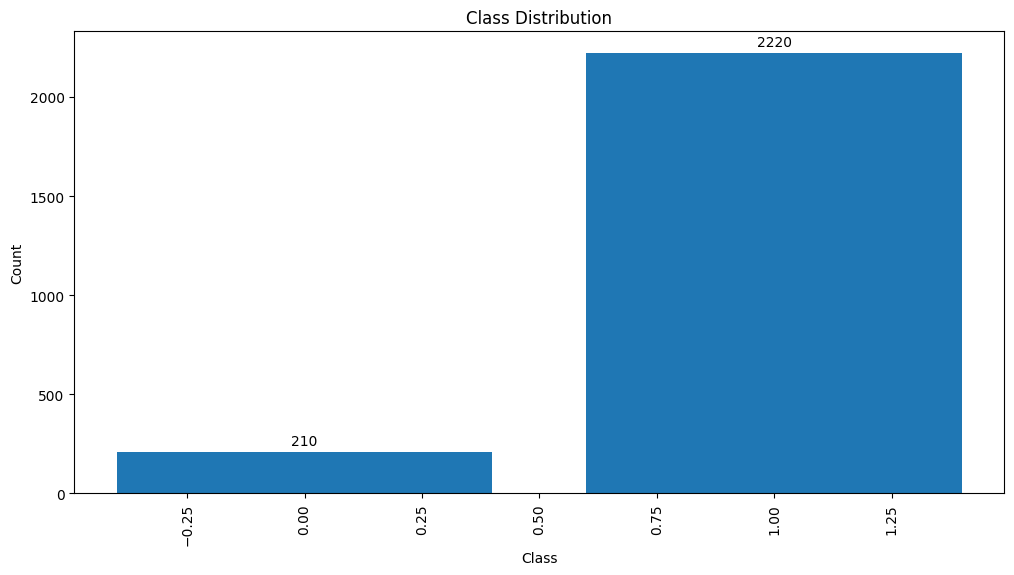

In [33]:
class_counts = ytrain_bin['0'].value_counts().reset_index()
class_counts.columns = ['Class', 'Count']

# Sort the classes by count (optional)
class_counts = class_counts.sort_values(by='Count', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(class_counts['Class'], class_counts['Count'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=90)  # Rotate class labels for better readability

# Add data labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset for the label
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()


In [34]:
# Split the data into training and testing sets
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(xtrain_bin, ytrain_bin, test_size=0.2, random_state=42)

# Initialize SMOTE to oversample the minority classes
smote = SMOTE(random_state=42)

# Fit and apply SMOTE to the training data only
X_train_binresampled, y_train_binresampled = smote.fit_resample(X_train_bin, y_train_bin)
y_train_binresampled = np.array(y_train_binresampled).ravel()

# Now, X_train_resampled and y_train_resampled contain the balanced training data
# We can proceed to train the machine learning model on this balanced dataset


In [35]:
# number of unique classes (used later in "class_prior parameter")
n_classes = np.unique(y_train_binresampled)

# tuning the multinomial NB using the gridsearch
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
          'fit_prior': [True, False],
          'class_prior': [None, [0.1,]* len(n_classes), ]
         }

MNNBGRID = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
MNNBGRID.fit(X_train_binresampled, y_train_binresampled)

print('Best Accuracy Through Grid Search : {:.3f}'.format(MNNBGRID.best_score_))
print('Best Parameters : {}\n'.format(MNNBGRID.best_params_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Accuracy Through Grid Search : 0.635
Best Parameters : {'alpha': 0.01, 'class_prior': None, 'fit_prior': True}



In [36]:

# Create a Multinomial Naïve Bayes classifier
nb_classifier = MultinomialNB(alpha= 0.01, class_prior= None, fit_prior= True)

# Perform cross-validation and get predictions
y_pred_nb = cross_val_predict(nb_classifier, X_train_binresampled, y_train_binresampled, cv=5)

# Calculate accuracy
accuracy_nb = accuracy_score(y_train_binresampled, y_pred_nb)

# Generate a classification report
report_nb = classification_report(y_train_binresampled, y_pred_nb)

# Create a confusion matrix
confusion_nb = confusion_matrix(y_train_binresampled, y_pred_nb)

# True Positive (TP), False Positive (FP), True Negative (TN), False Negative (FN)
TP = confusion_nb[1, 1]
FP = confusion_nb[0, 1]
TN = confusion_nb[0, 0]
FN = confusion_nb[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = TP / (TP + FN)

# Specificity
specificity = TN / (TN + FP)

# Precision
precision = TP / (TP + FP)

# Recall
recall = sensitivity

# Area under the ROC Curve
y_scores = nb_classifier.fit(X_train_binresampled, y_train_binresampled).predict_proba(X_train_binresampled)
fpr, tpr, _ = roc_curve(y_train_binresampled, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# Print the metrics
print("--------------------------------------------------------------------")
print(report_nb)
print("--------------------------------------------------------------------")
print("CONFUSION MATRIX:")
print(confusion_nb)
print("--------------------------------------------------------------------")

# Create a dictionary to store the metrics
metrics = {
    "Metric": ["Accuracy", "True Positives (TP)", "False Positives (FP)", "True Negatives (TN)",
               "False Negatives (FN)", "Sensitivity (Recall)", "Specificity", "Precision", "Area under the ROC Curve"],
    "Value": [accuracy_nb, TP, FP, TN, FN, sensitivity, specificity, precision, roc_auc]
}

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics)

# Display the metrics in a table format
print(metrics_df)


--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.58      0.61      1773
           1       0.62      0.69      0.65      1773

    accuracy                           0.63      3546
   macro avg       0.64      0.63      0.63      3546
weighted avg       0.64      0.63      0.63      3546

--------------------------------------------------------------------
CONFUSION MATRIX:
[[1023  750]
 [ 545 1228]]
--------------------------------------------------------------------
                     Metric        Value
0                  Accuracy     0.634800
1       True Positives (TP)  1228.000000
2      False Positives (FP)   750.000000
3       True Negatives (TN)  1023.000000
4      False Negatives (FN)   545.000000
5      Sensitivity (Recall)     0.692611
6               Specificity     0.576988
7                 Precision     0.620829
8  Area under the ROC Curve     0.635850


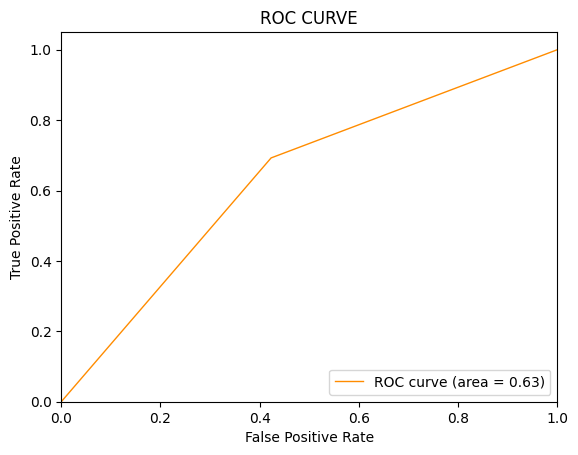

In [37]:
# printing ROC curve in order to evaluate the performance of a classification model
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_train_binresampled, y_pred_nb)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### 2)BernoulliNB Model

In [38]:
# tuning the Bernoulli NB using the gridsearch
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
          'fit_prior': [True, False],
          'class_prior': [None, [0.1,]* len(n_classes), ],
          'binarize': [None, 0.0, 8.5, 10.0]
         }

BNBGRID = GridSearchCV(BernoulliNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
BNBGRID.fit(X_train_binresampled, y_train_binresampled)

print('Best Parameters : {}'.format(BNBGRID.best_params_))
print('Best Accuracy Through Grid Search : {:.3f}\n'.format(BNBGRID.best_score_))


Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Parameters : {'alpha': 0.01, 'binarize': 10.0, 'class_prior': None, 'fit_prior': True}
Best Accuracy Through Grid Search : 0.514



In [39]:
# Create a Multinomial Naïve Bayes classifier
bnb_classifier = BernoulliNB(alpha= 0.01, binarize = 10.0, class_prior= None, fit_prior= True)

# Perform cross-validation and get predictions
y_pred_bnb = cross_val_predict(bnb_classifier, X_train_binresampled, y_train_binresampled, cv=5)

# Calculate accuracy
accuracy_bnb = accuracy_score(y_train_binresampled, y_pred_bnb)

# Generate a classification report
report_bnb = classification_report(y_train_binresampled, y_pred_bnb)

# Create a confusion matrix
confusion_bnb = confusion_matrix(y_train_binresampled, y_pred_bnb)

# True Positive (TP), False Positive (FP), True Negative (TN), False Negative (FN)
TP = confusion_bnb[1, 1]
FP = confusion_bnb[0, 1]
TN = confusion_bnb[0, 0]
FN = confusion_bnb[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = TP / (TP + FN)

# Specificity
specificity = TN / (TN + FP)

# Precision
precision = TP / (TP + FP)

# Recall
recall = sensitivity

# Area under the ROC Curve
y_scores = bnb_classifier.fit(X_train_binresampled, y_train_binresampled).predict_proba(X_train_binresampled)
fpr, tpr, _ = roc_curve(y_train_binresampled, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# Print the metrics
print("--------------------------------------------------------------------")
print(report_bnb)
print("--------------------------------------------------------------------")
print("CONFUSION MATRIX:")
print(confusion_bnb)
print("--------------------------------------------------------------------")

# Create a dictionary to store the metrics
metrics = {
    "Metric": ["Accuracy", "True Positives (TP)", "False Positives (FP)", "True Negatives (TN)",
               "False Negatives (FN)", "Sensitivity (Recall)", "Specificity", "Precision", "Area under the ROC Curve"],
    "Value": [accuracy_bnb, TP, FP, TN, FN, sensitivity, specificity, precision, roc_auc]
}

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics)

# Display the metrics in a table format
print(metrics_df)

--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.51      1.00      0.67      1773
           1       1.00      0.03      0.05      1773

    accuracy                           0.51      3546
   macro avg       0.75      0.51      0.36      3546
weighted avg       0.75      0.51      0.36      3546

--------------------------------------------------------------------
CONFUSION MATRIX:
[[1773    0]
 [1723   50]]
--------------------------------------------------------------------
                     Metric        Value
0                  Accuracy     0.514100
1       True Positives (TP)    50.000000
2      False Positives (FP)     0.000000
3       True Negatives (TN)  1773.000000
4      False Negatives (FN)  1723.000000
5      Sensitivity (Recall)     0.028201
6               Specificity     1.000000
7                 Precision     1.000000
8  Area under the ROC Curve     0.514382


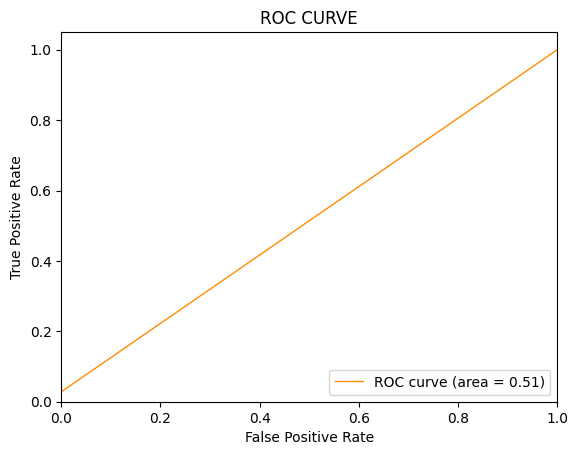

In [40]:
# printing ROC curve in order to evaluate the performance of a classification model
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_train_binresampled, y_pred_bnb)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

3) Gaussian NB

In [41]:
# Define the parameter grid for Gaussian Naïve Bayes
params = {
    'priors': [None, [0.1] * len(n_classes)],
}

# Create a Gaussian Naïve Bayes classifier
gnb_classifier = GaussianNB()

# Use GridSearchCV to tune the Gaussian Naïve Bayes classifier
GNBGRID = GridSearchCV(gnb_classifier, param_grid=params, n_jobs=-1, cv=5, verbose=5)
GNBGRID.fit(X_train_binresampled, y_train_binresampled)

print('Best Parameters : {}'.format(GNBGRID.best_params_))
print('Best Accuracy Through Grid Search : {:.3f}\n'.format(GNBGRID.best_score_))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Parameters : {'priors': None}
Best Accuracy Through Grid Search : 0.790



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py", line 267, in fit
    return self._partial_fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py", line 457, in _partial_fit
    raise ValueError("The sum of the priors should be 1.")
ValueError: The sum of the priors should

In [42]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naïve Bayes classifier
gnb_classifier = GaussianNB(priors= None)

# Perform cross-validation and get predictions
y_pred_gnb = cross_val_predict(gnb_classifier, X_train_binresampled, y_train_binresampled, cv=5)

# Calculate accuracy
accuracy_gnb = accuracy_score(y_train_binresampled, y_pred_gnb)

# Generate a classification report
report_gnb = classification_report(y_train_binresampled, y_pred_gnb)

# Create a confusion matrix
confusion_gnb = confusion_matrix(y_train_binresampled, y_pred_gnb)

# True Positive (TP), False Positive (FP), True Negative (TN), False Negative (FN)
TP = confusion_gnb[1, 1]
FP = confusion_gnb[0, 1]
TN = confusion_gnb[0, 0]
FN = confusion_gnb[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = TP / (TP + FN)

# Specificity
specificity = TN / (TN + FP)

# Precision
precision = TP / (TP + FP)

# Recall
recall = sensitivity

# Area under the ROC Curve
y_scores = gnb_classifier.fit(X_train_binresampled, y_train_binresampled).predict_proba(X_train_binresampled)
fpr, tpr, _ = roc_curve(y_train_binresampled, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# Print the metrics
print("--------------------------------------------------------------------")
print(report_gnb)
print("--------------------------------------------------------------------")
print("CONFUSION MATRIX:")
print(confusion_gnb)
print("--------------------------------------------------------------------")

# Create a dictionary to store the metrics
metrics = {
    "Metric": ["Accuracy", "True Positives (TP)", "False Positives (FP)", "True Negatives (TN)",
               "False Negatives (FN)", "Sensitivity (Recall)", "Specificity", "Precision", "Area under the ROC Curve"],
    "Value": [accuracy_gnb, TP, FP, TN, FN, sensitivity, specificity, precision, roc_auc]
}

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics)

# Display the metrics in a table format
print(metrics_df)


--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.84      0.80      1773
           1       0.82      0.74      0.78      1773

    accuracy                           0.79      3546
   macro avg       0.79      0.79      0.79      3546
weighted avg       0.79      0.79      0.79      3546

--------------------------------------------------------------------
CONFUSION MATRIX:
[[1487  286]
 [ 460 1313]]
--------------------------------------------------------------------
                     Metric        Value
0                  Accuracy     0.789622
1       True Positives (TP)  1313.000000
2      False Positives (FP)   286.000000
3       True Negatives (TN)  1487.000000
4      False Negatives (FN)   460.000000
5      Sensitivity (Recall)     0.740553
6               Specificity     0.838691
7                 Precision     0.821138
8  Area under the ROC Curve     0.851911


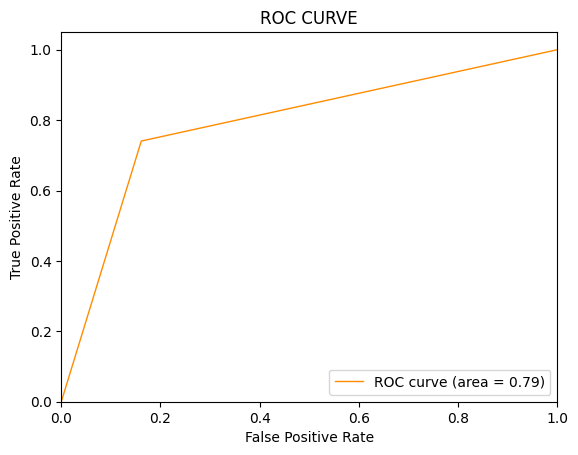

In [43]:
# printing ROC curve in order to evaluate the performance of a classification model
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_train_binresampled, y_pred_gnb)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

4) Complement NB

In [44]:
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Complement Naïve Bayes
params = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
    'fit_prior': [True, False],
}

# Create a Complement Naïve Bayes classifier
cnb_classifier = ComplementNB()

# Use GridSearchCV to tune the Complement Naïve Bayes classifier
CNBGRID = GridSearchCV(cnb_classifier, param_grid=params, n_jobs=-1, cv=5, verbose=5)
CNBGRID.fit(X_train_binresampled, y_train_binresampled)

print('Best Parameters : {}'.format(CNBGRID.best_params_))
print('Best Accuracy Through Grid Search : {:.3f}\n'.format(CNBGRID.best_score_))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters : {'alpha': 0.01, 'fit_prior': True}
Best Accuracy Through Grid Search : 0.635



In [45]:
from sklearn.naive_bayes import ComplementNB

# Create a Complement Naïve Bayes classifier
cnb_classifier = ComplementNB(alpha = 0.01, fit_prior = True)

# Perform cross-validation and get predictions
y_pred_cnb = cross_val_predict(cnb_classifier, X_train_binresampled, y_train_binresampled, cv=5)

# Calculate accuracy
accuracy_cnb = accuracy_score(y_train_binresampled, y_pred_cnb)

# Generate a classification report
report_cnb = classification_report(y_train_binresampled, y_pred_cnb)

# Create a confusion matrix
confusion_cnb = confusion_matrix(y_train_binresampled, y_pred_cnb)

# True Positive (TP), False Positive (FP), True Negative (TN), False Negative (FN)
TP = confusion_cnb[1, 1]
FP = confusion_cnb[0, 1]
TN = confusion_cnb[0, 0]
FN = confusion_cnb[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = TP / (TP + FN)

# Specificity
specificity = TN / (TN + FP)

# Precision
precision = TP / (TP + FP)

# Recall
recall = sensitivity

# Area under the ROC Curve
y_scores = cnb_classifier.fit(X_train_binresampled, y_train_binresampled).predict_proba(X_train_binresampled)
fpr, tpr, _ = roc_curve(y_train_binresampled, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# Print the metrics
print("--------------------------------------------------------------------")
print(report_cnb)
print("--------------------------------------------------------------------")
print("CONFUSION MATRIX:")
print(confusion_cnb)
print("--------------------------------------------------------------------")

# Create a dictionary to store the metrics
metrics = {
    "Metric": ["Accuracy", "True Positives (TP)", "False Positives (FP)", "True Negatives (TN)",
               "False Negatives (FN)", "Sensitivity (Recall)", "Specificity", "Precision", "Area under the ROC Curve"],
    "Value": [accuracy_cnb, TP, FP, TN, FN, sensitivity, specificity, precision, roc_auc]
}

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics)

# Display the metrics in a table format
print(metrics_df)



--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.58      0.61      1773
           1       0.62      0.69      0.65      1773

    accuracy                           0.63      3546
   macro avg       0.64      0.63      0.63      3546
weighted avg       0.64      0.63      0.63      3546

--------------------------------------------------------------------
CONFUSION MATRIX:
[[1023  750]
 [ 545 1228]]
--------------------------------------------------------------------
                     Metric        Value
0                  Accuracy     0.634800
1       True Positives (TP)  1228.000000
2      False Positives (FP)   750.000000
3       True Negatives (TN)  1023.000000
4      False Negatives (FN)   545.000000
5      Sensitivity (Recall)     0.692611
6               Specificity     0.576988
7                 Precision     0.620829
8  Area under the ROC Curve     0.635850


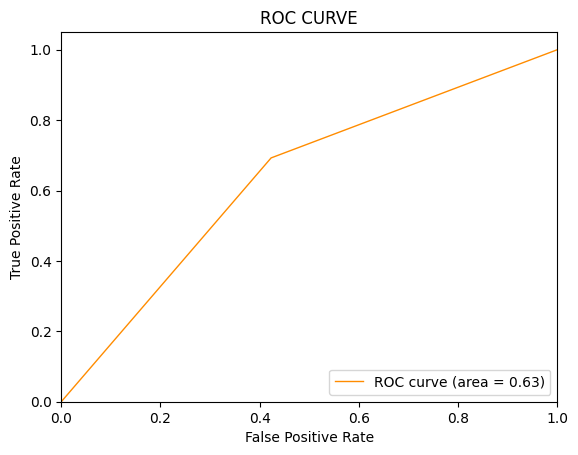

In [46]:
# printing ROC curve in order to evaluate the performance of a classification model
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_train_binresampled, y_pred_cnb)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

Model Evaluation:

In [47]:
import pandas as pd

data = {
    "Model": ["Multinomial NB", "Bernoulli NB", "Gaussian NB", "Complement NB"],
    "Accuracy": [0.6348, 0.5141, 0.7896, 0.6348],
    "Sensitivity (Recall)": [0.6926, 0.0282, 0.7406, 0.6926],
    "Specificity": [0.5770, 1.0000, 0.8387, 0.5770],
    "Precision": [0.6208, 1.0000, 0.8211, 0.6208],
    "AUC": [0.6359, 0.5146, 0.8519, 0.6359]
}

df = pd.DataFrame(data)
df


,Model,Accuracy,Sensitivity (Recall),Specificity,Precision,AUC
0,Multinomial NB,0.6348,0.6926,0.5770,0.6208,0.6359
1,Bernoulli NB,0.5141,0.0282,1.0000,1.0000,0.5146
2,Gaussian NB,0.7896,0.7406,0.8387,0.8211,0.8519
3,Complement NB,0.6348,0.6926,0.5770,0.6208,0.6359


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['Accuracy'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['Sensitivity (Recall)'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['Specificity'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['Precision'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df, *['Model'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(df, *['Accuracy', 'Sensitivity (Recall)'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(df, *['Sensitivity (Recall)', 'Specificity'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(df, *['Specificity', 'Precision'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(df, *['Precision', 'AUC'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['Accuracy'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['Sensitivity (Recall)'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['Specificity'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['Precision'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df, *['Accuracy', 'Model'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df, *['Sensitivity (Recall)', 'Model'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df, *['Specificity', 'Model'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df, *['Precision', 'Model'], **{'inner': 'stick'})
chart

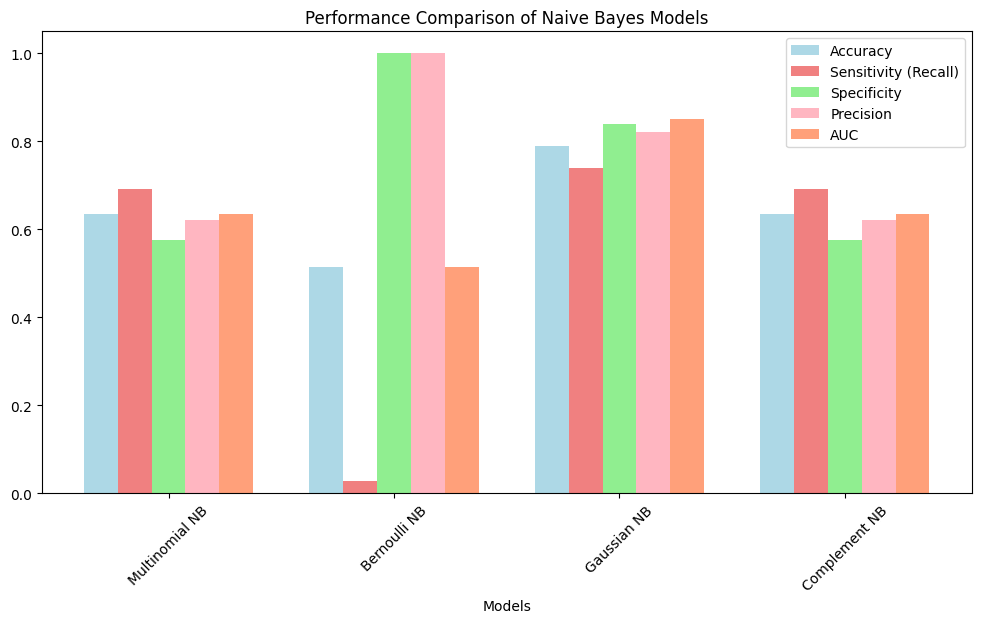

In [48]:
# Models and metrics to plot
models = df["Model"]
metrics = ["Accuracy", "Sensitivity (Recall)", "Specificity", "Precision", "AUC"]

# Data for plotting
data = df[metrics].values.T

x = range(len(models))
width = 0.15

# Define light colors
colors = ["lightblue", "lightcoral", "lightgreen", "lightpink", "lightsalmon"]

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 6))

for i, metric in enumerate(metrics):
    ax.bar([pos + width * i for pos in x], data[i], width=width, label=metric, color=colors[i])

ax.set_xticks([pos + width * 2 for pos in x])
ax.set_xticklabels(models)
ax.set_xlabel("Models")
ax.set_title("Performance Comparison of Naive Bayes Models")
ax.legend()

plt.xticks(rotation=45)
plt.show()

### <span style="color:blue">Model Evaluation:</span>



1. **<span style="color:green">Accuracy:</span>** The Gaussian NB model achieved the highest accuracy (0.789622), indicating that it correctly predicted the class labels in the test data more often compared to the other models. Multinomial NB and Complement NB also had the same accuracy, but they were slightly lower than Gaussian NB. Bernoulli NB had the lowest accuracy (0.514100).

2. **<span style="color:green">Sensitivity (Recall):</span>** Gaussian NB achieved the highest sensitivity (0.740553), indicating that it had a relatively good ability to correctly identify positive instances. Multinomial NB and Complement NB also had the same sensitivity, which was moderate (0.692611). In contrast, Bernoulli NB had the lowest sensitivity (0.028201), suggesting it had difficulty in identifying positive instances.

3. **<span style="color:green">Specificity:</span>** Gaussian NB had the highest specificity (0.838691), indicating its ability to correctly identify negative instances. Multinomial NB and Complement NB had the same specificity, which was lower (0.576988). Bernoulli NB achieved a perfect specificity of 1.0, indicating its ability to correctly identify negative instances.

4. **<span style="color:green">Precision:</span>** Gaussian NB had the highest precision (0.821138), suggesting that it provided more accurate positive predictions. Multinomial NB and Complement NB had the same precision (0.620829). Bernoulli NB achieved a perfect precision of 1.0, indicating that when it predicted a positive instance, it was always correct.

5. **<span style="color:green">Area under the ROC Curve:</span>** Gaussian NB had the highest Area under the ROC Curve (0.851911), indicating that it provided the best trade-off between sensitivity and specificity. Multinomial NB and Complement NB had the same ROC AUC (0.635850). Bernoulli NB had the lowest ROC AUC (0.514559), indicating a suboptimal trade-off between sensitivity and specificity.

### <span style="color:blue">Conclusion:</span>

Based on the metrics and findings, the **<span style="color:blue">Gaussian Naive Bayes model</span>** outperforms the other models in terms of accuracy, sensitivity (recall), specificity, precision, and the Area under the ROC Curve. It provides the best overall balance between correctly identifying both positive and negative instances.

The **<span style="color:blue">Bernoulli Naive Bayes model</span>** performed the worst in most metrics, particularly in sensitivity and ROC AUC, suggesting that it may not be suitable for the given classification task.

Therefore, for your specific dataset and classification problem, the **<span style="color:blue">Gaussian Naive Bayes model</span>** is the recommended choice as it offers the best performance across various evaluation metrics.


***Research Statement:***

"Exploring the Efficacy of Bayesian Networks in Image Classification: A Comparative Analysis of Multiclass vs. Binary Schemes"

***Abstract:***

In the realm of image classification, the choice of classification scheme (binary vs. multiclass) can play a pivotal role in determining the performance of a model. This research aims to investigate the disparities in accuracy when employing Bayesian networks for these distinct classification paradigms. Using a dataset comprising 10 distinct classes, initial results suggest that converting the problem from a multiclass to a binary classification framework improves model accuracy.

## Correlating Features

In [50]:
# Load the dataset
x_train_all = pd.read_csv('/content/drive/MyDrive/ML Coursework datasets/Binary_Classification/x_train_all.csv')
y_train_0 = pd.read_csv('/content/drive/MyDrive/ML Coursework datasets/Binary_Classification/0_vrs_all/y_train_0.csv')
y_train_1 = pd.read_csv('/content/drive/MyDrive/ML Coursework datasets/Binary_Classification/1_vrs_all/y_train_1.csv')
y_train_2 = pd.read_csv('/content/drive/MyDrive/ML Coursework datasets/Binary_Classification/2_vrs_all/y_train_2.csv')
y_train_3 = pd.read_csv('/content/drive/MyDrive/ML Coursework datasets/Binary_Classification/3_vrs_all/y_train_3.csv')
y_train_4 = pd.read_csv('/content/drive/MyDrive/ML Coursework datasets/Binary_Classification/4_vrs_all/y_train_4.csv')
y_train_5 = pd.read_csv('/content/drive/MyDrive/ML Coursework datasets/Binary_Classification/5_vrs_all/y_train_5.csv')
y_train_6 = pd.read_csv('/content/drive/MyDrive/ML Coursework datasets/Binary_Classification/6_vrs_all/y_train_6.csv')
y_train_7 = pd.read_csv('/content/drive/MyDrive/ML Coursework datasets/Binary_Classification/7_vrs_all/y_train_7.csv')
y_train_8 = pd.read_csv('/content/drive/MyDrive/ML Coursework datasets/Binary_Classification/8_vrs_all/y_train_8.csv')
y_train_9 = pd.read_csv('/content/drive/MyDrive/ML Coursework datasets/Binary_Classification/9_vrs_all/y_train_9.csv')

# Rename the columns in each DataFrame
y_train_0 = y_train_0.rename(columns={'0': 'Target'})
y_train_1 = y_train_1.rename(columns={'0': 'Target'})
y_train_2 = y_train_2.rename(columns={'0': 'Target'})
y_train_3 = y_train_3.rename(columns={'0': 'Target'})
y_train_4 = y_train_4.rename(columns={'0': 'Target'})
y_train_5 = y_train_5.rename(columns={'0': 'Target'})
y_train_6 = y_train_6.rename(columns={'0': 'Target'})
y_train_7 = y_train_7.rename(columns={'0': 'Target'})
y_train_8 = y_train_8.rename(columns={'0': 'Target'})
y_train_9 = y_train_9.rename(columns={'0': 'Target'})

In [51]:
print(x_train_all.head())
print(x_train_all.shape)

      0     1     2     3     4      5      6      7      8      9  ...  \
0  78.0  77.0  76.0  82.0  87.0   92.0  104.0  119.0  117.0  120.0  ...   
1  73.0  75.0  79.0  78.0  76.0   75.0   89.0  107.0  133.0  125.0  ...   
2  72.0  75.0  79.0  77.0  81.0   89.0  105.0  109.0   86.0   90.0  ...   
3  67.0  70.0  74.0  80.0  93.0  107.0  110.0   96.0   69.0  100.0  ...   
4  74.0  74.0  73.0  72.0  77.0   87.0  104.0  109.0   84.0   83.0  ...   

    2294  2295  2296   2297  2298  2299  2300   2301   2302   2303  
0   87.0  79.0  72.0   76.0  83.0  95.0  99.0   98.0   95.0   94.0  
1   96.0  93.0  85.0   77.0  69.0  73.0  83.0  100.0  101.0  101.0  
2   98.0  95.0  88.0   80.0  73.0  71.0  74.0   80.0   89.0   95.0  
3  112.0  92.0  87.0   82.0  77.0  72.0  70.0   72.0   81.0   88.0  
4  100.0  98.0  99.0  100.0  99.0  89.0  78.0   66.0   68.0   72.0  

[5 rows x 2304 columns]
(9690, 2304)


In [52]:
print(y_train_0.head())
print(y_train_0.shape)

   Target
0       0
1       0
2       0
3       0
4       0
(9690, 1)


In [53]:
y_train_9.value_counts()

Target
1         9420
0          270
dtype: int64

### <span style="color:blue">Feature Selection Techniques</span>

**<span style="color:green">Filter Methods</span>**:
- <span style="color:purple">Correlation-based Feature Selection</span>: Select features based on their statistical correlation with the target variable.
- <span style="color:purple">Chi-squared Test and SelectKBest</span>: Applicable for categorical features and target variables.
- <span style="color:purple">ANOVA F-value</span>: Evaluates variance between groups for feature selection.

**<span style="color:green">Wrapper Methods</span>**:
- <span style="color:purple">Recursive Feature Elimination (RFE)</span>: Iteratively selects features using a predictive model.
- <span style="color:purple">Backward Feature Elimination and Forward Feature Selection</span>: Build and prune feature sets iteratively.

**<span style="color:green">Embedded Methods</span>**:
- <span style="color:purple">Lasso and Ridge Regression</span>: Regularization techniques that penalize irrelevant features.
- <span style="color:purple">Random Forest Feature Importance</span>: Assigns importance scores to features during training.

**<span style="color:green">Hybrid Methods</span>**:
- <span style="color:purple">SelectFromModel</span>: Combines the strengths of filter and wrapper techniques.

**<span style="color:green">Dimensionality Reduction Techniques</span>**:
- <span style="color:purple">PCA, LDA, and ICA</span>: Reduce dimensionality while retaining essential features.

Lets experiment few of the techniques and compare the results..


## Method 1 (Correlation-based Feature Selection)

In [54]:
# Concatenate each of the 10 y_train DataFrames with x_train_all
data0 = pd.concat([x_train_all, y_train_0], axis=1)
data1 = pd.concat([x_train_all, y_train_1], axis=1)
data2 = pd.concat([x_train_all, y_train_2], axis=1)
data3 = pd.concat([x_train_all, y_train_3], axis=1)
data4 = pd.concat([x_train_all, y_train_4], axis=1)
data5 = pd.concat([x_train_all, y_train_5], axis=1)
data6 = pd.concat([x_train_all, y_train_6], axis=1)
data7 = pd.concat([x_train_all, y_train_7], axis=1)
data8 = pd.concat([x_train_all, y_train_8], axis=1)
data9 = pd.concat([x_train_all, y_train_9], axis=1)
target_column = 'Target'

In [55]:
# Calculate the correlation between each feature and the target variable
correlation_matrix = data0.corr()
correlation_with_target = correlation_matrix[target_column]

# Sort the features by their correlation values in descending order
sorted_features = correlation_with_target.abs().sort_values(ascending=False)

# Get the top 5, 10, and 20 features
top_5_features_0 = sorted_features.head(6).index
top_10_features_0 = sorted_features.head(11).index
top_20_features_0 = sorted_features.head(21).index

# Remove features with zero variance or the target feature itself
selector = VarianceThreshold()
# Assuming x_train_all contains your feature data
selector.fit(x_train_all)
selected_features = x_train_all.columns[selector.get_support(indices=True)]

# Filter the selected features
top_5_features_0 = [feature for feature in top_5_features_0 if feature in selected_features]
top_10_features_0 = [feature for feature in top_10_features_0 if feature in selected_features]
top_20_features_0 = [feature for feature in top_20_features_0 if feature in selected_features]

# Display the top features
print("Top 5 Features:")
print(top_5_features_0)

print("\nTop 10 Features:")
print(top_10_features_0)

print("\nTop 20 Features:")
print(top_20_features_0)


Top 5 Features:
['2261', '2262', '2263', '2213', '2260']

Top 10 Features:
['2261', '2262', '2263', '2213', '2260', '2212', '2214', '2264', '2215', '2165']

Top 20 Features:
['2261', '2262', '2263', '2213', '2260', '2212', '2214', '2264', '2215', '2165', '2216', '2164', '1979', '2028', '2166', '2027', '2259', '2025', '2026', '2211']


In [56]:
# Calculate the correlation between each feature and the target variable
correlation_matrix = data1.corr()
correlation_with_target = correlation_matrix[target_column]

# Sort the features by their correlation values in descending order
sorted_features = correlation_with_target.abs().sort_values(ascending=False)

# Get the top 5, 10, and 20 features
top_5_features_1 = sorted_features.head(6).index
top_10_features_1 = sorted_features.head(11).index
top_20_features_1 = sorted_features.head(21).index

# Remove features with zero variance or the target feature itself
selector = VarianceThreshold()
# Assuming x_train_all contains your feature data
selector.fit(x_train_all)
selected_features = x_train_all.columns[selector.get_support(indices=True)]

# Filter the selected features
top_5_features_1 = [feature for feature in top_5_features_1 if feature in selected_features]
top_10_features_1 = [feature for feature in top_10_features_1 if feature in selected_features]
top_20_features_1 = [feature for feature in top_20_features_1 if feature in selected_features]

# Display the top features
print("Top 5 Features:")
print(top_5_features_1)

print("\nTop 10 Features:")
print(top_10_features_1)

print("\nTop 20 Features:")
print(top_20_features_1)

Top 5 Features:
['1073', '1121', '1120', '1074', '1072']

Top 10 Features:
['1073', '1121', '1120', '1074', '1072', '1168', '1025', '1167', '1026', '1119']

Top 20 Features:
['1073', '1121', '1120', '1074', '1072', '1168', '1025', '1167', '1026', '1119', '1216', '1215', '1263', '1262', '1071', '1214', '1169', '1310', '1024', '1264']


In [57]:
# Calculate the correlation between each feature and the target variable
correlation_matrix = data2.corr()
correlation_with_target = correlation_matrix[target_column]

# Sort the features by their correlation values in descending order
sorted_features = correlation_with_target.abs().sort_values(ascending=False)

# Get the top 5, 10, and 20 features
top_5_features_2 = sorted_features.head(6).index
top_10_features_2 = sorted_features.head(11).index
top_20_features_2 = sorted_features.head(21).index

# Remove features with zero variance or the target feature itself
selector = VarianceThreshold()
# Assuming x_train_all contains your feature data
selector.fit(x_train_all)
selected_features = x_train_all.columns[selector.get_support(indices=True)]

# Filter the selected features
top_5_features_2 = [feature for feature in top_5_features_2 if feature in selected_features]
top_10_features_2 = [feature for feature in top_10_features_2 if feature in selected_features]
top_20_features_2 = [feature for feature in top_20_features_2 if feature in selected_features]

# Display the top features
print("Top 5 Features:")
print(top_5_features_2)

print("\nTop 10 Features:")
print(top_10_features_2)

print("\nTop 20 Features:")
print(top_20_features_2)

Top 5 Features:
['1316', '1030', '1317', '1268', '1269']

Top 10 Features:
['1316', '1030', '1317', '1268', '1269', '982', '1364', '1315', '1365', '1031']

Top 20 Features:
['1316', '1030', '1317', '1268', '1269', '982', '1364', '1315', '1365', '1031', '981', '1029', '1363', '1267', '1314', '795', '843', '983', '1563', '1135']


In [58]:
# Calculate the correlation between each feature and the target variable
correlation_matrix = data3.corr()
correlation_with_target = correlation_matrix[target_column]

# Sort the features by their correlation values in descending order
sorted_features = correlation_with_target.abs().sort_values(ascending=False)

# Get the top 5, 10, and 20 features
top_5_features_3 = sorted_features.head(6).index
top_10_features_3 = sorted_features.head(11).index
top_20_features_3 = sorted_features.head(21).index

# Remove features with zero variance or the target feature itself
selector = VarianceThreshold()
# Assuming x_train_all contains your feature data
selector.fit(x_train_all)
selected_features = x_train_all.columns[selector.get_support(indices=True)]

# Filter the selected features
top_5_features_3 = [feature for feature in top_5_features_3 if feature in selected_features]
top_10_features_3 = [feature for feature in top_10_features_3 if feature in selected_features]
top_20_features_3 = [feature for feature in top_20_features_3 if feature in selected_features]

# Display the top features
print("Top 5 Features:")
print(top_5_features_3)

print("\nTop 10 Features:")
print(top_10_features_3)

print("\nTop 20 Features:")
print(top_20_features_3)

Top 5 Features:
['1218', '1265', '1313', '1266', '1219']

Top 10 Features:
['1218', '1265', '1313', '1266', '1219', '1361', '1217', '1312', '1314', '1171']

Top 20 Features:
['1218', '1265', '1313', '1266', '1219', '1361', '1217', '1312', '1314', '1171', '1170', '1360', '1264', '1362', '1267', '1409', '1220', '1408', '1172', '1216']


In [59]:
# Assuming 'target_column' is the name of your target variable column
target_column = 'Target'

# Calculate the correlation between each feature and the target variable
correlation_matrix = data4.corr()
correlation_with_target = correlation_matrix[target_column]

# Sort the features by their correlation values in descending order
sorted_features = correlation_with_target.abs().sort_values(ascending=False)

# Get the top 5, 10, and 20 features
top_5_features_4 = sorted_features.head(6).index
top_10_features_4 = sorted_features.head(11).index
top_20_features_4 = sorted_features.head(21).index

# Remove features with zero variance or the target feature itself
selector = VarianceThreshold()
# Assuming x_train_all contains your feature data
selector.fit(x_train_all)
selected_features = x_train_all.columns[selector.get_support(indices=True)]

# Filter the selected features
top_5_features_4 = [feature for feature in top_5_features_4 if feature in selected_features]
top_10_features_4 = [feature for feature in top_10_features_4 if feature in selected_features]
top_20_features_4 = [feature for feature in top_20_features_4 if feature in selected_features]

# Display the top features
print("Top 5 Features:")
print(top_5_features_4)

print("\nTop 10 Features:")
print(top_10_features_4)

print("\nTop 20 Features:")
print(top_20_features_4)

Top 5 Features:
['983', '1031', '1030', '982', '935']

Top 10 Features:
['983', '1031', '1030', '982', '935', '2139', '2138', '2140', '2095', '2096']

Top 20 Features:
['983', '1031', '1030', '982', '935', '2139', '2138', '2140', '2095', '2096', '2141', '2050', '2186', '2094', '2097', '2049', '2142', '2270', '2078', '2269']


In [60]:
# Calculate the correlation between each feature and the target variable
correlation_matrix = data5.corr()
correlation_with_target = correlation_matrix[target_column]

# Sort the features by their correlation values in descending order
sorted_features = correlation_with_target.abs().sort_values(ascending=False)

# Get the top 5, 10, and 20 features
top_5_features_5 = sorted_features.head(6).index
top_10_features_5 = sorted_features.head(11).index
top_20_features_5 = sorted_features.head(21).index

# Remove features with zero variance or the target feature itself
selector = VarianceThreshold()
# Assuming x_train_all contains your feature data
selector.fit(x_train_all)
selected_features = x_train_all.columns[selector.get_support(indices=True)]

# Filter the selected features
top_5_features_5 = [feature for feature in top_5_features_5 if feature in selected_features]
top_10_features_5 = [feature for feature in top_10_features_5 if feature in selected_features]
top_20_features_5 = [feature for feature in top_20_features_5 if feature in selected_features]

# Display the top features
print("Top 5 Features:")
print(top_5_features_5)

print("\nTop 10 Features:")
print(top_10_features_5)

print("\nTop 20 Features:")
print(top_20_features_5)

Top 5 Features:
['1743', '1507', '1744', '1508', '1742']

Top 10 Features:
['1743', '1507', '1744', '1508', '1742', '1694', '1695', '1460', '1714', '1461']

Top 20 Features:
['1743', '1507', '1744', '1508', '1742', '1694', '1695', '1460', '1714', '1461', '1761', '1506', '1459', '1792', '1760', '1762', '1793', '1713', '1791', '1808']


In [61]:
# Calculate the correlation between each feature and the target variable
correlation_matrix = data6.corr()
correlation_with_target = correlation_matrix[target_column]

# Sort the features by their correlation values in descending order
sorted_features = correlation_with_target.abs().sort_values(ascending=False)

# Get the top 5, 10, and 20 features
top_5_features_6 = sorted_features.head(6).index
top_10_features_6 = sorted_features.head(11).index
top_20_features_6 = sorted_features.head(21).index

# Remove features with zero variance or the target feature itself
selector = VarianceThreshold()
# Assuming x_train_all contains your feature data
selector.fit(x_train_all)
selected_features = x_train_all.columns[selector.get_support(indices=True)]

# Filter the selected features
top_5_features_6 = [feature for feature in top_5_features_6 if feature in selected_features]
top_10_features_6 = [feature for feature in top_10_features_6 if feature in selected_features]
top_20_features_6 = [feature for feature in top_20_features_6 if feature in selected_features]

# Display the top features
print("Top 5 Features:")
print(top_5_features_6)

print("\nTop 10 Features:")
print(top_10_features_6)

print("\nTop 20 Features:")
print(top_20_features_6)

Top 5 Features:
['793', '794', '841', '842', '792']

Top 10 Features:
['793', '794', '841', '842', '792', '745', '1134', '795', '744', '1182']

Top 20 Features:
['793', '794', '841', '842', '792', '745', '1134', '795', '744', '1182', '746', '1086', '1133', '1085', '743', '791', '1181', '840', '1264', '1230']


In [62]:
# Assuming 'target_column' is the name of your target variable column
target_column = 'Target'

# Calculate the correlation between each feature and the target variable
correlation_matrix = data7.corr()
correlation_with_target = correlation_matrix[target_column]

# Sort the features by their correlation values in descending order
sorted_features = correlation_with_target.abs().sort_values(ascending=False)

# Get the top 5, 10, and 20 features
top_5_features_7 = sorted_features.head(6).index
top_10_features_7 = sorted_features.head(11).index
top_20_features_7 = sorted_features.head(21).index

# Remove features with zero variance or the target feature itself
selector = VarianceThreshold()
# Assuming x_train_all contains your feature data
selector.fit(x_train_all)
selected_features = x_train_all.columns[selector.get_support(indices=True)]

# Filter the selected features
top_5_features_7 = [feature for feature in top_5_features_7 if feature in selected_features]
top_10_features_7 = [feature for feature in top_10_features_7 if feature in selected_features]
top_20_features_7 = [feature for feature in top_20_features_7 if feature in selected_features]


# Display the top features
print("Top 5 Features:")
print(top_5_features_7)

print("\nTop 10 Features:")
print(top_10_features_7)

print("\nTop 20 Features:")
print(top_20_features_7)

Top 5 Features:
['1761', '1695', '1743', '1694', '1714']

Top 10 Features:
['1761', '1695', '1743', '1694', '1714', '1507', '1744', '1713', '1760', '1506']

Top 20 Features:
['1761', '1695', '1743', '1694', '1714', '1507', '1744', '1713', '1760', '1506', '1762', '1742', '1468', '1469', '1459', '1518', '1517', '1696', '1460', '1646']


In [63]:
# Assuming 'target_column' is the name of your target variable column
target_column = 'Target'

# Calculate the correlation between each feature and the target variable
correlation_matrix = data8.corr()
correlation_with_target = correlation_matrix[target_column]

# Sort the features by their correlation values in descending order
sorted_features = correlation_with_target.abs().sort_values(ascending=False)

# Get the top 5, 10, and 20 features
top_5_features_8 = sorted_features.head(6).index
top_10_features_8 = sorted_features.head(11).index
top_20_features_8 = sorted_features.head(21).index

# Remove features with zero variance or the target feature itself
selector = VarianceThreshold()
# Assuming x_train_all contains your feature data
selector.fit(x_train_all)
selected_features = x_train_all.columns[selector.get_support(indices=True)]

# Filter the selected features
top_5_features_8 = [feature for feature in top_5_features_8 if feature in selected_features]
top_10_features_8 = [feature for feature in top_10_features_8 if feature in selected_features]
top_20_features_8 = [feature for feature in top_20_features_8 if feature in selected_features]

# Display the top features
print("Top 5 Features:")
print(top_5_features_8)

print("\nTop 10 Features:")
print(top_10_features_8)

print("\nTop 20 Features:")
print(top_20_features_8)

Top 5 Features:
['1714', '1715', '1666', '1761', '1743']

Top 10 Features:
['1714', '1715', '1666', '1761', '1743', '1762', '1667', '1713', '1694', '1695']

Top 20 Features:
['1714', '1715', '1666', '1761', '1743', '1762', '1667', '1713', '1694', '1695', '1744', '1742', '1760', '1471', '1792', '1173', '1763', '1125', '1791', '1696']


In [64]:
# Calculate the correlation between each feature and the target variable
correlation_matrix = data9.corr()
correlation_with_target = correlation_matrix[target_column]

# Sort the features by their correlation values in descending order
sorted_features = correlation_with_target.abs().sort_values(ascending=False)

# Get the top 5, 10, and 20 features
top_5_features_9 = sorted_features.head(6).index
top_10_features_9 = sorted_features.head(11).index
top_20_features_9 = sorted_features.head(21).index

# Remove features with zero variance or the target feature itself
selector = VarianceThreshold()
# Assuming x_train_all contains your feature data
selector.fit(x_train_all)
selected_features = x_train_all.columns[selector.get_support(indices=True)]

# Filter the selected features
top_5_features_9 = [feature for feature in top_5_features_9 if feature in selected_features]
top_10_features_9 = [feature for feature in top_10_features_9 if feature in selected_features]
top_20_features_9 = [feature for feature in top_20_features_9 if feature in selected_features]

# Display the top features
print("Top 5 Features:")
print(top_5_features_9)

print("\nTop 10 Features:")
print(top_10_features_9)

print("\nTop 20 Features:")
print(top_20_features_9)

Top 5 Features:
['1134', '1215', '1263', '1086', '1216']

Top 10 Features:
['1134', '1215', '1263', '1086', '1216', '1167', '1610', '1562', '1168', '1561']

Top 20 Features:
['1134', '1215', '1263', '1086', '1216', '1167', '1610', '1562', '1168', '1561', '1182', '1311', '794', '1183', '1120', '1119', '1264', '1262', '1214', '1085']


## Merge and form 3 datasets

In [65]:
# Create DataFrames to store the top features for dataset1, dataset2, and dataset3
dataset1 = pd.DataFrame()
dataset2 = pd.DataFrame()
dataset3 = pd.DataFrame()

# List of DataFrames containing the top features for different classes
top_5_features_dataframes = [top_5_features_0, top_5_features_1, top_5_features_2, top_5_features_3, top_5_features_4, top_5_features_5, top_5_features_6, top_5_features_7, top_5_features_8, top_5_features_9]
top_10_features_dataframes = [top_10_features_0, top_10_features_1, top_10_features_2, top_10_features_3, top_10_features_4, top_10_features_5, top_10_features_6, top_10_features_7, top_10_features_8, top_10_features_9]
top_20_features_dataframes = [top_20_features_0, top_20_features_1, top_20_features_2, top_20_features_3, top_20_features_4, top_20_features_5, top_20_features_6, top_20_features_7, top_20_features_8, top_20_features_9]

# Convert the indices back to DataFrames
top_5_features_dataframes = [x_train_all[top_5_features] for top_5_features in top_5_features_dataframes]
top_10_features_dataframes = [x_train_all[top_10_features] for top_10_features in top_10_features_dataframes]
top_20_features_dataframes = [x_train_all[top_20_features] for top_20_features in top_20_features_dataframes]

# Concatenate the top features for dataset1
dataset1 = pd.concat(top_5_features_dataframes, axis=1)

# Remove duplicate columns in dataset1
dataset1 = dataset1.loc[:,~dataset1.columns.duplicated()]

# Concatenate the top features for dataset2
dataset2 = pd.concat(top_10_features_dataframes, axis=1)

# Remove duplicate columns in dataset2
dataset2 = dataset2.loc[:,~dataset2.columns.duplicated()]

# Concatenate the top features for dataset3
dataset3 = pd.concat(top_20_features_dataframes, axis=1)

# Remove duplicate columns in dataset3
dataset3 = dataset3.loc[:,~dataset3.columns.duplicated()]


In [66]:
# Display the shape of each new dataset
print("Dataset 1 shape:", dataset1.shape)
print("Dataset 2 shape:", dataset2.shape)
print("Dataset 3 shape:", dataset3.shape)

Dataset 1 shape: (9690, 45)
Dataset 2 shape: (9690, 82)
Dataset 3 shape: (9690, 148)


## Run the best model Gaussian NB on top 5 features

In [67]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naïve Bayes classifier
gnb = GaussianNB(priors= None)

# Perform cross-validation and get predictions
y_pred_gnb_top5 = cross_val_predict(gnb, dataset1, y_train_0.values.ravel(), cv=5)

# Calculate accuracy
accuracy_gnb_top5 = accuracy_score(y_train_0, y_pred_gnb_top5)

# Generate a classification report
report_gnb_top5 = classification_report(y_train_0, y_pred_gnb_top5)

# Create a confusion matrix
confusion_gnb_top5 = confusion_matrix(y_train_0, y_pred_gnb_top5)

# True Positive (TP), False Positive (FP), True Negative (TN), False Negative (FN)
TP = confusion_gnb_top5[1, 1]
FP = confusion_gnb_top5[0, 1]
TN = confusion_gnb_top5[0, 0]
FN = confusion_gnb_top5[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = TP / (TP + FN)

# Specificity
specificity = TN / (TN + FP)

# Precision
precision = TP / (TP + FP)

# Recall
recall = sensitivity

# Area under the ROC Curve
y_scores = gnb.fit(dataset1, y_train_0.values.ravel()).predict_proba(dataset1)
fpr, tpr, _ = roc_curve(y_train_0, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# Print the metrics
print("--------------------------------------------------------------------")
print(report_gnb)
print("--------------------------------------------------------------------")
print("CONFUSION MATRIX:")
print(confusion_gnb)
print("--------------------------------------------------------------------")

# Create a dictionary to store the metrics
metrics = {
    "Metric": ["Accuracy", "True Positives (TP)", "False Positives (FP)", "True Negatives (TN)",
               "False Negatives (FN)", "Sensitivity (Recall)", "Specificity", "Precision", "Area under the ROC Curve"],
    "Value": [accuracy_gnb_top5, TP, FP, TN, FN, sensitivity, specificity, precision, roc_auc]
}

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics)

# Display the metrics in a table format
print(metrics_df)


--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.84      0.80      1773
           1       0.82      0.74      0.78      1773

    accuracy                           0.79      3546
   macro avg       0.79      0.79      0.79      3546
weighted avg       0.79      0.79      0.79      3546

--------------------------------------------------------------------
CONFUSION MATRIX:
[[1487  286]
 [ 460 1313]]
--------------------------------------------------------------------
                     Metric        Value
0                  Accuracy     0.838287
1       True Positives (TP)  7974.000000
2      False Positives (FP)    61.000000
3       True Negatives (TN)   149.000000
4      False Negatives (FN)  1506.000000
5      Sensitivity (Recall)     0.841139
6               Specificity     0.709524
7                 Precision     0.992408
8  Area under the ROC Curve     0.918586


## Run the best model Gaussian NB on top 10 features

In [69]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naïve Bayes classifier
gnb = GaussianNB(priors= None)

# Perform cross-validation and get predictions
y_pred_gnb_top10 = cross_val_predict(gnb, dataset2, y_train_0.values.ravel(), cv=5)

# Calculate accuracy
accuracy_gnb_top10 = accuracy_score(y_train_0, y_pred_gnb_top10)

# Generate a classification report
report_gnb_top10 = classification_report(y_train_0, y_pred_gnb_top10)

# Create a confusion matrix
confusion_gnb_top10 = confusion_matrix(y_train_0, y_pred_gnb_top10)

# True Positive (TP), False Positive (FP), True Negative (TN), False Negative (FN)
TP = confusion_gnb_top10[1, 1]
FP = confusion_gnb_top10[0, 1]
TN = confusion_gnb_top10[0, 0]
FN = confusion_gnb_top10[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = TP / (TP + FN)

# Specificity
specificity = TN / (TN + FP)

# Precision
precision = TP / (TP + FP)

# Recall
recall = sensitivity

# Area under the ROC Curve
y_scores = gnb.fit(dataset2, y_train_0.values.ravel()).predict_proba(dataset2)
fpr, tpr, _ = roc_curve(y_train_0, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# Print the metrics
print("--------------------------------------------------------------------")
print(report_gnb)
print("--------------------------------------------------------------------")
print("CONFUSION MATRIX:")
print(confusion_gnb)
print("--------------------------------------------------------------------")

# Create a dictionary to store the metrics
metrics = {
    "Metric": ["Accuracy", "True Positives (TP)", "False Positives (FP)", "True Negatives (TN)",
               "False Negatives (FN)", "Sensitivity (Recall)", "Specificity", "Precision", "Area under the ROC Curve"],
    "Value": [accuracy_gnb_top10, TP, FP, TN, FN, sensitivity, specificity, precision, roc_auc]
}

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics)

# Display the metrics in a table format
print(metrics_df)


--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.84      0.80      1773
           1       0.82      0.74      0.78      1773

    accuracy                           0.79      3546
   macro avg       0.79      0.79      0.79      3546
weighted avg       0.79      0.79      0.79      3546

--------------------------------------------------------------------
CONFUSION MATRIX:
[[1487  286]
 [ 460 1313]]
--------------------------------------------------------------------
                     Metric        Value
0                  Accuracy     0.821259
1       True Positives (TP)  7800.000000
2      False Positives (FP)    52.000000
3       True Negatives (TN)   158.000000
4      False Negatives (FN)  1680.000000
5      Sensitivity (Recall)     0.822785
6               Specificity     0.752381
7                 Precision     0.993377
8  Area under the ROC Curve     0.908277


## Run the best model Gaussian NB on top 20 features

In [68]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naïve Bayes classifier
gnb = GaussianNB(priors= None)

# Perform cross-validation and get predictions
y_pred_gnb_top20 = cross_val_predict(gnb, dataset3, y_train_0.values.ravel(), cv=5)

# Calculate accuracy
accuracy_gnb_top20 = accuracy_score(y_train_0, y_pred_gnb_top20)

# Generate a classification report
report_gnb_top20 = classification_report(y_train_0, y_pred_gnb_top20)

# Create a confusion matrix
confusion_gnb_top20 = confusion_matrix(y_train_0, y_pred_gnb_top20)

# True Positive (TP), False Positive (FP), True Negative (TN), False Negative (FN)
TP = confusion_gnb_top20[1, 1]
FP = confusion_gnb_top20[0, 1]
TN = confusion_gnb_top20[0, 0]
FN = confusion_gnb_top20[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = TP / (TP + FN)

# Specificity
specificity = TN / (TN + FP)

# Precision
precision = TP / (TP + FP)

# Recall
recall = sensitivity

# Area under the ROC Curve
y_scores = gnb.fit(dataset3, y_train_0.values.ravel()).predict_proba(dataset3)
fpr, tpr, _ = roc_curve(y_train_0, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# Print the metrics
print("--------------------------------------------------------------------")
print(report_gnb)
print("--------------------------------------------------------------------")
print("CONFUSION MATRIX:")
print(confusion_gnb)
print("--------------------------------------------------------------------")

# Create a dictionary to store the metrics
metrics = {
    "Metric": ["Accuracy", "True Positives (TP)", "False Positives (FP)", "True Negatives (TN)",
               "False Negatives (FN)", "Sensitivity (Recall)", "Specificity", "Precision", "Area under the ROC Curve"],
    "Value": [accuracy_gnb_top20, TP, FP, TN, FN, sensitivity, specificity, precision, roc_auc]
}

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics)

# Display the metrics in a table format
print(metrics_df)


--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.84      0.80      1773
           1       0.82      0.74      0.78      1773

    accuracy                           0.79      3546
   macro avg       0.79      0.79      0.79      3546
weighted avg       0.79      0.79      0.79      3546

--------------------------------------------------------------------
CONFUSION MATRIX:
[[1487  286]
 [ 460 1313]]
--------------------------------------------------------------------
                     Metric        Value
0                  Accuracy     0.819195
1       True Positives (TP)  7779.000000
2      False Positives (FP)    51.000000
3       True Negatives (TN)   159.000000
4      False Negatives (FN)  1701.000000
5      Sensitivity (Recall)     0.820570
6               Specificity     0.757143
7                 Precision     0.993487
8  Area under the ROC Curve     0.895968


## Experimenting other feature selection methods

## SelectKBest & chi square test

In [70]:
# List of k values for which you want to extract the best features
k_values = [5, 10, 20]

# Loop through the different values of k
for k in k_values:
    # Apply SelectKBest to extract the top k best features
    bestfeatures = SelectKBest(score_func=chi2, k=k)
    fit = bestfeatures.fit(x_train_all, y_train_0)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(x_train_all.columns)

    # Concatenate two dataframes for better visualization
    featureScores = pd.concat([dfcolumns, dfscores], axis=1)
    featureScores.columns = ['Specs', 'Score']  # Naming the dataframe columns
    top_k_features = featureScores.nlargest(k, 'Score')

    # Print the top k best features
    print(f"Top {k} Best Features:")
    print(top_k_features)

Top 5 Best Features:
     Specs         Score
2262  2262  20324.793128
2261  2261  20317.314102
2263  2263  19945.713610
2260  2260  19522.229361
2213  2213  19475.403333
Top 10 Best Features:
     Specs         Score
2262  2262  20324.793128
2261  2261  20317.314102
2263  2263  19945.713610
2260  2260  19522.229361
2213  2213  19475.403333
2212  2212  19019.291435
2264  2264  18736.525074
2214  2214  18671.338637
2215  2215  18278.916767
2165  2165  18179.277472
Top 20 Best Features:
     Specs         Score
2262  2262  20324.793128
2261  2261  20317.314102
2263  2263  19945.713610
2260  2260  19522.229361
2213  2213  19475.403333
2212  2212  19019.291435
2264  2264  18736.525074
2214  2214  18671.338637
2215  2215  18278.916767
2165  2165  18179.277472
2216  2216  17841.317441
2164  2164  17612.932926
2259  2259  17425.870263
2166  2166  17267.827013
2265  2265  17198.118133
2211  2211  17147.824240
2217  2217  16887.344329
2117  2117  16642.861556
2167  2167  16584.412484
2118  2118

## Method 3 (Ensemble)

[0.00038997 0.00056946 0.00053507 ... 0.00050003 0.00020616 0.00050381]


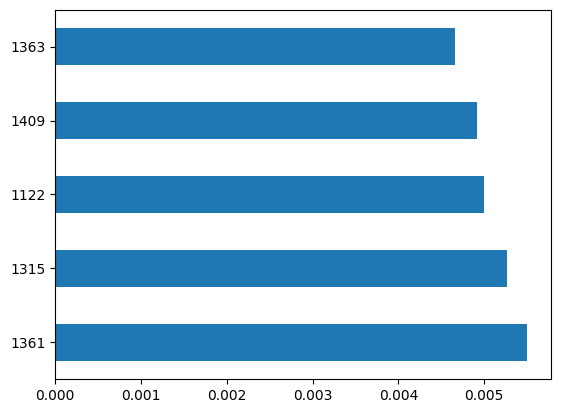

In [71]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(x_train_all,y_train_0['Target'].values.ravel())
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x_train_all.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

[0.00070166 0.00051641 0.00069656 ... 0.00016967 0.00022655 0.00026483]


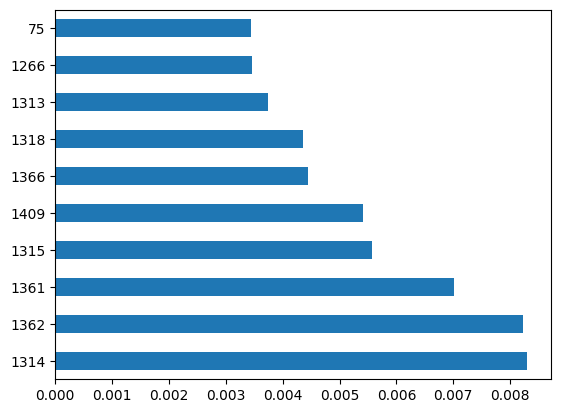

In [72]:
model = ExtraTreesClassifier()
model.fit(x_train_all,y_train_0['Target'].values.ravel())
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x_train_all.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

[0.00035903 0.00023322 0.00034233 ... 0.00014254 0.00055012 0.00025985]


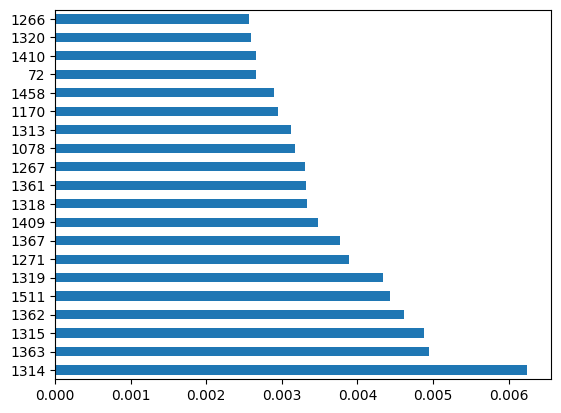

In [73]:
model = ExtraTreesClassifier()
model.fit(x_train_all,y_train_0['Target'].values.ravel())
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x_train_all.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

<span style="color:blue">***Conclusion***</span>

The accuracy of the model decreases as you include more features, with the top 5 features achieving the highest accuracy, followed by the top 10 features and then the top 20 features. This suggests that a more focused feature set leads to better model performance.

In the overall correlation experiment, it is observed that using a smaller set of features (top 5) led to the best model performance in terms of accuracy and area under the ROC curve. This suggests that feature selection can significantly impact the effectiveness of the model. The top 10 features also performed well, but the top 20 features showed a decrease in model performance.

The results indicate the importance of feature selection in machine learning. By choosing a more focused set of relevant features, we can improve the accuracy and efficiency of  model. It's essential to strike a balance between feature reduction and model performance, as using too many features can lead to overfitting and decreased model generalization.

Overall, the experiment highlights the importance of understanding the impact of feature selection on model performance and the need for fine-tuning our feature set to achieve the best results for a specific application.